# Comparing Multiple Means with an ANOVA F-test

Import necessary libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
from scipy import stats

Change working directory

In [2]:
os.chdir("/Users/nstevens/Dropbox/Teaching/MSDS_629/2023/Lectures/Lecture4")

Read in the data:

In [3]:
candy = pd.read_csv('candycrush.csv')
candy.head(10)

,time,booster
0,9.675618,3
1,4.446914,1
2,10.403742,3
3,6.693658,2
4,5.777017,2
5,6.597787,2
6,4.156369,1
7,10.443116,3
8,4.290790,1
9,5.927310,2


Visualize the data

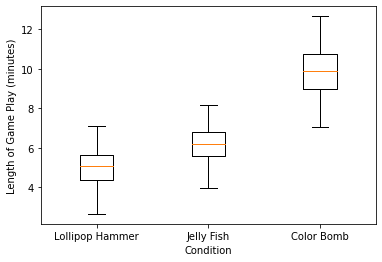

In [4]:
y1 = candy[candy["booster"]==1]["time"]
y2 = candy[candy["booster"]==2]["time"]
y3 = candy[candy["booster"]==3]["time"]
y = [y1, y2, y3]
plt.boxplot(y, labels = ["Lollipop Hammer", "Jelly Fish", "Color Bomb"]);
plt.ylabel("Length of Game Play (minutes)");
plt.xlabel("Condition");

Let us next test $$H_0:\mu_1=\mu_2=\mu_3 \text{ vs. }H_A:\mu_j\neq\mu_k \text{ for some }j\neq k$$ using an _appopriately defined_ linear regression model. Note that the subscripts 1, 2, 3 respectively refer to the lollipop hammer, jelly fish, and color bomb conditions.

We first use the `ols` function from the `statsmodels` library.

In [6]:
model = smf.ols('time ~ C(booster)', data = candy).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     851.9
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          3.28e-139
Time:                        11:22:34   Log-Likelihood:                -509.81
No. Observations:                 373   AIC:                             1026.
Df Residuals:                     370   BIC:                             1037.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.0128      0.087     57.859      0.000       4.842       5.183
C(booster)[T.2]     1.1753      0.119      9.851      0.000       0.941       1.410
C(booster)[T.3]     4.8828      0.124     39.515      0.000       4.640       5.126
==============================================================================
Omnibus:                        0.272   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.873   Jarque-Bera (JB):                0.392
Skew:                          -0.039   Prob(JB):                        0.822
Kurtosis:                       2.862   Cond. No.                         3.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see from this output that the relevant test statistic is 851.9 and the associated p-value is 3.28e-139 on 2 and 370 degrees of freedom. Clearly we reject the null hypothesis and conclude that the expected playing time is not the same in each of the booster conditions.

Next let us do this calculation manually.

In [7]:
m = 3
n1 = len(y1)
n2 = len(y2)
n3 = len(y3)
N = n1 + n2 + n3
ybar = np.mean(candy["time"])
SSC = n1*(np.mean(y1) - ybar)**2 + n2*(np.mean(y2) - ybar)**2 + n3*(np.mean(y3) - ybar)**2 
SSE = np.sum((y1 - np.mean(y1))**2) + np.sum((y2 - np.mean(y2))**2) + np.sum((y3 - np.mean(y3))**2)
t = (SSC/(m-1)) / (SSE/(N-m))
pv = stats.f.sf(t, dfn = m-1, dfd = N-m)
print("t =", t)
print("p-value =", pv)

t = 851.8947210813038
p-value = 3.2798729094423308e-139
